# Objective: 

To automatically generate new random music based on users’ selected mood, with as little user input as possible. 

This can be helpful for individuals who want a music track that can resonate with their current thoughts and emotions, and can have potential use for mental health apps. Other than that, creating music this way allows video content creators to use sound tracks that fit into their videos hopefully without having to worry about copyright issues, something extremely common and feared within the content creator community.


**The VGMIDI Dataset**

There are 95 MIDI labelled piano pieces from video sound tracks, and each piece was annotated by 30 human subjects according to a valence-arousal model. Video sound tracks are used, because the music is composed in a way to keep the player in a certain affective state.
The sentiment of each piece is extracted by summarizing the 30 annotations and
mapping them to the 2-D model, which represents emotion. Valence indicates positive versus negative emotion, and arousal indicates emotional intensity. Data is processed such that each piece has a 1 or 0 valence and arousal values. For example, if a piece has valence value 1 and arousal value 1, it would be classified as a happy and delighted song.


*   **sent 0= depressed**

*   **sent 1=calm**
*   **sent 2=angry**
***sent 3=excited,happy**

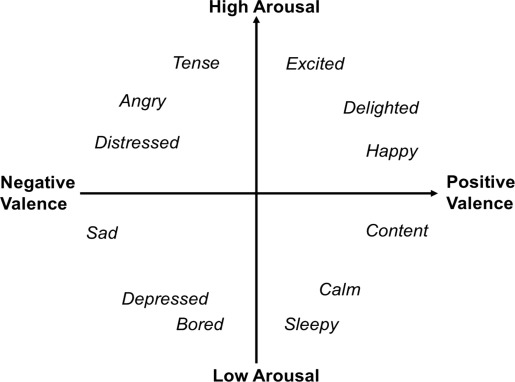
Reference: [picture source](https://www.sciencedirect.com/science/article/pii/S0968090X19313099)

Github: https://github.com/lucasnfe/vgmidi

Reference paper and details of the annoation process: [LEARNING TO GENERATE MUSIC WITH SENTIMENT](http://www.lucasnferreira.com/papers/2019/ismir-learning.pdf)


We would like to first create a simpler model which generates songs with either positive or negative emotion. Hence, we only consider the valence dimension at this stage.

The model we use to achieve our goal consists of two components, an LSTM, which stands for long-short term memory, is very ideal for classifying, processing and predicting time-series data, in our case it is music. The other part is a logistic regression ideal for classifying the input into a discrete set of classes, in our case emotions. Currently, we support four main emotions: happy, sad, angry, and calm.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
module_dir = (
    "/content/drive/MyDrive/COMP3359 AI Applications Project/"
)


import os
import pandas as pd
data_root_dir = os.path.join(module_dir, "vgmidi-master/")
train_csv_path = os.path.join(data_root_dir, "vgmidi_train.csv")
print(os.path.exists(train_csv_path))
train_csv_df = pd.read_csv(train_csv_path)
print(train_csv_df)
for col in train_csv_df.columns:
    print(col)
print(train_csv_df["feeling"])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
False


FileNotFoundError: ignored

In [ ]:
data_95_root_dir = os.path.join(module_dir, 'vgmidi_95_700/')
# into Logistic Regression
labelled_95_path = os.path.join(data_95_root_dir, 'labelled/')
train_labelled_95_path = os.path.join(labelled_95_path, 'vgmidi_sent_train.csv')
test_labelled_95_path = os.path.join(labelled_95_path, 'vgmidi_sent_test.csv')
# the unlabelled ones are all midi files, into mLSTM
unlabelled_95_path = os.path.join(data_95_root_dir, 'unlabelled')
train_unlabelled_95_path = os.path.join(unlabelled_95_path, 'train/')
test_unlabelled_95_path = os.path.join(unlabelled_95_path, 'test/')

print(os.listdir(data_95_root_dir))
print(os.listdir(labelled_95_path))
print(os.listdir(unlabelled_95_path))
print(os.listdir(train_unlabelled_95_path)[0:5])
print(os.listdir(test_unlabelled_95_path)[0:5])

train_labelled_95_df = pd.read_csv(train_labelled_95_path)
train_labelled_95_paths = [ os.path.join(labelled_95_path, file_path) for file_path in train_labelled_95_df["filepath"]]

['labelled', 'unlabelled', 'README.md', '.gitignore']
['phrases', 'pieces', 'vgmidi_sent_test.csv', 'vgmidi_raw.json', 'vgmidi_sent_train.gsheet', 'Backup of vgmidi_sent_train.csv', 'vgmidi_sent_train.csv', 'vgmidi_sent_test.gsheet']
['test', 'train', '40train', '31smalltest']
['Pokemon_Black_White_Bicycle.mid', 'Pokemon_Diamond_Pearl_DialgaandPalkiaBattle.mid', 'Pokemon_Diamond_Pearl_PokemonLeagueDay.mid', 'Pokemon_Diamond_Pearl_SandgemTown.mid', 'Pokemon_Diamond_Pearl_TwinleafTownDay.mid']
['BanjoKazooie_BoggysIglooHappy.mid', 'BanjoKazooie_BubblegloopSwamp.mid', 'BanjoKazooie_ClickClockWood.mid', 'BanjoKazooie_Ending.mid', 'BanjoKazooie_BoggysIglooSad.mid']


# Data Visualisation

Reference (May add later):


1.   https://towardsdatascience.com/visualizing-musical-performance-5da28b96957a
2.   https://github.com/DRyanMiller/MIDI_Visualization



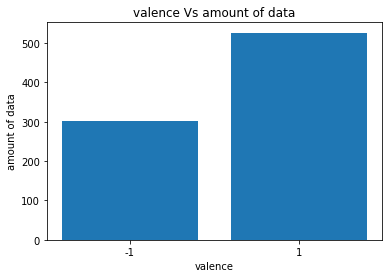

In [ ]:
import matplotlib.pyplot as plt
   
valence = ['-1','1']
l = len(train_labelled_95_df)
train_neg_valence = train_labelled_95_df[train_labelled_95_df["label"]==-1]
train_pos_valence = train_labelled_95_df[train_labelled_95_df["label"]== 1]
GDP_Per_Capita = [len(train_neg_valence),len(train_pos_valence)]

plt.bar(valence, GDP_Per_Capita)
plt.title('valence Vs amount of data')
plt.xlabel('valence')
plt.ylabel('amount of data')
plt.show()

In [ ]:
#!pip install MIDIFile

In [ ]:
file_name = os.path.join(module_dir, 'generated/generated_neg1.mid')
print(file_name)
#MIDIFile.Track.parse(file_name)

/content/drive/MyDrive/COMP3359 AI Applications Project/generated/generated_neg1.mid


In [ ]:
#@title hidden
# mid = MidiFile(file_name) 

# message_list = []
# for i in mid.tracks[1][1:-1]: 
#         message_list.append(i)  

# message_strings = []
# for x in message_list:
#         message_strings.append(str(x))
# message_strings_split = []
# for message in message_strings:  
#         split_str = message.split(" ")
#         message_strings_split.append(split_str)
# message_type = []
# for item in message_strings_split:
#         message_type.append(item[0])
# df1 = pd.DataFrame(message_type)
# df1.columns = ['message_type']

# attributes = []
# for item in message_strings_split:
#         attributes.append(item[1:])
# attributes_dict = [{}]  
# removedatr = attributes.pop(0)  

# for item in attributes:
#         for i in item:
#             key, val = i.split("=")
#             if key in attributes_dict[-1]:
#                 attributes_dict.append({})
#             attributes_dict[-1][key] = val
# df2 = pd.DataFrame.from_dict(attributes_dict)
# df_complete = pd.concat([df1, df2], axis=1)

# #Transform the time and note attributes from strings to floats
# df_complete.time = df_complete.time.astype(float)

# df_complete.note = df_complete.note.astype(float).astype("Int32")

# #Engineer a time elapsed attribute equal to the cumulative sum of time.
# df_complete['time_elapsed'] = df_complete.time.cumsum()

# df_filtered = df_complete[df_complete['message_type']=='note_on']
# df_filtered = df_filtered.loc[df_filtered['velocity'] != '0']


# df_filtered.drop(['channel', 'value', 'control', 'time'], axis=1, inplace=True)
# try:
#     df_filtered.drop('program', axis=1, inplace=True)
# except:
#     pass

# add_first_row = []

# df_final = pd.concat([pd.DataFrame(add_first_row), df_filtered], ignore_index=True)
# add_first_row.insert(0, {'message_type': 'note_on', 'note': 0, 'time': 0, 'velocity': 0, 'time_elapsed':-df_final.iloc[-1]['time_elapsed']*0.05})

# last_time_elapsed = df_final.iloc[-1]['time_elapsed']*1.05
# add_last_row = []
# add_last_row.insert(0, {'message_type': 'note_on', 'note': 127, 'time': 0, 'velocity': 0, 'time_elapsed':last_time_elapsed})
# df_final = pd.concat([df_final, pd.DataFrame(add_last_row)], ignore_index=True)

Visualizing

In [ ]:
#@title hidden
# print(removedatr)
# print(attributes[0])
# print(attributes[1])
# print(attributes[2])

In [ ]:
#@title Default title text
# sns.set_style('white')
# palette='icefire'
# g = sns.jointplot(df_final.time_elapsed, df_final.note, cmap=palette,
#     kind='hex', xlim=(min(df_final.time_elapsed),max(df_final.time_elapsed)),
#     ylim=(16,113),
#     joint_kws=dict(gridsize=88)
#     )
# g.fig.set_figwidth(10) #original 30
# g.fig.set_figheight(10)


In [ ]:
!pip3 install tensorflow tensorflow-gpu numpy music21

     |████████████████████████████████| 394.3MB 35kB/s 


In [ ]:
!ls /content/drive/MyDrive/'COMP3359 AI Applications Project'

'(2_Fiona) Moody Music Generator Model.ipynb'
 Accuracy
'Backup of Trained'
'COMP3359 Group 10 Final Work Report.gdoc'
'COMP3359 Group 10 Interim Prototype.gdoc'
'COMP3359 Group 10 Proposal.gdoc'
 copy_evolve_generative.py
 evolve_generative.py
'(Fiona) Moody Music Generator Model.ipynb'
 generated
'generated (mp3)'
'(Joyce) Moody Music Generator Model.ipynb'
 lossRecord_withNoise0.2.csv
 lossRecord_withNoise0.2.gsheet
 lossRecord_withoutNoise.gsheet
 MAESTRO_midi_graph.py
 midi_encoder.py
 midi_generator.py
'Moody Music Generator Model.ipynb'
'Music Sentiment Evaluation Survey.gform'
 music-sentneuron-master
 plot_results.py
'Previous Training Log.gdoc'
 __pycache__
 README.md
 results
 test_ground
 train_classifier.py
 trained
 trained_loss17432_withDropoutLayer
 trained_withNoise_025AdjustDrop
 trained_withNoise_AdjustDrop
 trained_WithoutNoise_Backup
 train_generative_drop025_withGaussianNoise.py
 train_generative.py
 train_generative_withDropoutLayer.py
 train_generative_withGauss

In [ ]:
%cd /content/drive/MyDrive/'COMP3359 AI Applications Project'
!pwd

/content/drive/.shortcut-targets-by-id/12gD1YohOImjnW4mDqfn5065HhOYf0gGC/COMP3359 AI Applications Project
/content/drive/.shortcut-targets-by-id/12gD1YohOImjnW4mDqfn5065HhOYf0gGC/COMP3359 AI Applications Project


In [ ]:
# Check if any GPU is detected

import tensorflow as tf
# print("Is GPU available: ", tf.test.is_gpu_available())
# print("GPU(s) found: ")
# print(tf.config.experimental.list_physical_devices('GPU'))
# print(tf.test.gpu_device_name())


In [ ]:

import train_generative_withDropoutLayer
import midi_encoder as me
# Encode midi files as text with vocab
train = "vgmidi_95_700/unlabelled/train/"
test = "vgmidi_95_700/unlabelled/test/"
train_text, train_vocab = me.load(train)
test_text, test_vocab = me.load(test)

# Build dictionary to map from char to integers
char2idx, vocab_size = train_generative_withDropoutLayer.build_char2idx(train_vocab, test_vocab)

# Copied from train_generative.py.__main__
#build_generative_model(vocab_size, opt.embed, opt.units, opt.layers, opt.batch, opt.drop)
test_model = train_generative_withDropoutLayer.build_generative_model(vocab_size, 256, 512, 4, 100, 0.05)
test_model.summary()
print(test_model.trainable_variables) 
# Load the previously saved weights
test_model.load_weights(latest)

test_model.summary()
print(test_model.trainable_variables)


In [ ]:
!pip3 install datetime

In [ ]:
import datetime as dt
print(dt.datetime.now())

In [ ]:
#with dropout layer 0.5,continue training from loss=1.7432
#4037/4037 [==============================] - 2076s 506ms/step - loss: 1.9182 - val_loss: 2.2815
#4037/4037 [==============================] - 2112s 514ms/step - loss: 1.8193 - val_loss: 2.3034
#4037/4037 [==============================] - 2130s 518ms/step - loss: 1.7609 - val_loss: 2.3254
#4037/4037 [==============================] - 2027s 494ms/step - loss: 1.6688 - val_loss: 2.3620

!python3.7 train_generative_withDropoutLayer.py --train vgmidi_95_700/unlabelled/train/ --test vgmidi_95_700/unlabelled/test/ --model trained_loss17432_withDropoutLayer --embed 256 --units 512 --layers 4 --batch 100 --epochs 1 --lrate 0.00001 --seqlen 256 --drop 0


2021-04-24 03:39:14.709291: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Black_White_Bicycle.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Diamond_Pearl_DialgaandPalkiaBattle.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Diamond_Pearl_PokemonLeagueDay.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Diamond_Pearl_SandgemTown.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Diamond_Pearl_TwinleafTownDay.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Gold_Silver_RivalBattle.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Gold_Silver_Route1.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Gold_Silver_Route12.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Gold_Silver_Route27.mid
Parsing midi file: vgmidi_95_700/unlabelled/train/Pokemon_Gold_Silver_

In [ ]:
#adjust the drop value to 0.15, continue training from the gaussian noise layer model
#4037/4037 [==============================] - 6794s 2s/step - loss: 1.7080 - val_loss: 2.2840
#4037/4037 [==============================] - 6720s 2s/step - loss: 1.6755 - val_loss: 2.2816
!python3.7 train_generative_withGaussianNoise.py --train vgmidi_95_700/unlabelled/train/ --test vgmidi_95_700/unlabelled/test/ --model trained_withNoise_AdjustDrop --embed 256 --units 512 --layers 4 --batch 100 --epochs 1 --lrate 0.00001 --seqlen 256 --drop 0.15


In [ ]:
#with the gaussian noise layer


!python3.7 train_generative_withGaussianNoise.py --train vgmidi_95_700/unlabelled/train/ --test vgmidi_95_700/unlabelled/test/ --model trained --embed 256 --units 512 --layers 4 --batch 100 --epochs 1 --lrate 0.00001 --seqlen 256 --drop 0.05


In [ ]:
#!python3.7 train_generative.py --train ../vgmidi/unlabelled/train/ --test ../vgmidi/unlabelled/test/ --embed 256 --units 512 --layers 4 --batch 64 --epochs 15 --lrate 0.00001 --seqlen 256 --drop 0.05
#Without noise, output to the trained_WithoutNoise_Backup folder
#4037/4037 [==============================] - 6841s 2s/step - loss: 1.7074 - val_loss: 2.2812
#4037/4037 [==============================] - 7133s 2s/step - loss: 1.6739 - val_loss: 2.2900
#4037/4037 [==============================] - 5197s 1s/step - loss: 1.6416 - val_loss: 2.2979
#4037/4037 [==============================] - 5262s 1s/step - loss: 1.6107 - val_loss: 2.3079
#4037/4037 [==============================] - 6667s 2s/step - loss: 1.5809 - val_loss: 2.3176
#4037/4037 [==============================] - ETA: 0s - loss: 1.5519
!python3.7 train_generative.py --train vgmidi_95_700/unlabelled/train/ --test vgmidi_95_700/unlabelled/test/ --model trained_WithoutNoise_Backup --embed 256 --units 512 --layers 4 --batch 100 --epochs 1 --lrate 0.00001 --seqlen 256 --drop 0.05


In [ ]:
latest = tf.train.latest_checkpoint("trained")
print(latest)

trained/generative_ckpt_1


In [ ]:
# For sampling from trained model without sentiment control
!python3.7 midi_generator.py --model trained --ch2ix trained/char2idx.json --embed 256 --units 512 --layers 4


2021-04-18 12:34:53.588803: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Override JSON file not provided.
2021-04-18 12:34:59.588345: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-18 12:34:59.589544: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-18 12:34:59.657135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-18 12:34:59.657961: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-04-18 12:34:59.658008: I tensorflow/stream

# Codes For Saving Useful Data to Analyse

In [ ]:
# Encodes labelled pieces and train logistic regression with labelled pieces
!python3.7 train_classifier.py --model trained --ch2ix trained/char2idx.json --embed 256 --units 512 --layers 4 --train vgmidi-master/vgmidi_train.csv --test vgmidi-master/vgmidi_test.csv --cellix 4


In [ ]:
# Evolve generative neurons for feeling = 0 muisc
!python3.7 evolve_generative.py --ch2ix trained_withNoise_AdjustDrop/char2idx.json --embed 256 --units 512 --layers 4 --genmodel trained_withNoise_AdjustDrop/ --clsmodel trained_withNoise_AdjustDrop/classifier_ckpt.p --cellix 4 --elitism 0.1 --epochs 10 --sent 3

2021-04-24 04:34:47.580484: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-24 04:34:53.804585: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-24 04:34:53.805486: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-24 04:34:53.829121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-24 04:34:53.829688: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-04-24 04:34:53.829725: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
# Evolve generative neurons for feeling = 1 muisc
!python3.7 evolve_generative.py --ch2ix trained_WithoutNoise_Backup/char2idx.json --embed 256 --units 512 --layers 4 --genmodel trained_WithoutNoise_Backup/ --clsmodel trained_WithoutNoise_Backup/classifier_ckpt.p --cellix 4 --elitism 0.1 --epochs 10 --sent 1


2021-04-18 16:37:43.640147: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-18 16:37:45.965949: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-18 16:37:45.966789: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-18 16:37:45.981821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-18 16:37:45.982386: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-04-18 16:37:45.982418: I tensorflow/stream_executor/platform/def

In [ ]:
# Evolve generative neurons for feeling = 2 muisc
!python3.7 evolve_generative.py --ch2ix trained_WithoutNoise_Backup/char2idx.json --embed 256 --units 512 --layers 4 --genmodel trained_WithoutNoise_Backup/ --clsmodel trained_WithoutNoise_Backup/classifier_ckpt.p --cellix 4 --elitism 0.1 --epochs 10 --sent 2


2021-04-16 18:05:28.026420: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-16 18:05:34.935226: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-16 18:05:34.936364: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-16 18:05:35.007064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-16 18:05:35.007866: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-04-16 18:05:35.007913: I tensorflow/stream_executor/platform/default/dso_lo

In [ ]:
# Evolve generative neurons for feeling = 3 music
!python3.7 evolve_generative.py --ch2ix trained_WithoutNoise_Backup/char2idx.json --embed 256 --units 512 --layers 4 --genmodel trained_WithoutNoise_Backup/ --clsmodel trained_WithoutNoise_Backup/classifier_ckpt.p --cellix 4 --elitism 0.1 --epochs 10 --sent 3


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
2021-04-16 19:59:49.406229: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "/usr/lib/python3.7/pkgutil.py", line 415, in get_importer
    importer = sys.path_importer_cache[path_item]
KeyError: ''

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "evolve_generative.py", line 6, in <module>
    import tensorflow as tf
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py", line 41, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/__init__.py", line 41, in <module>
    from tensorflow.python.eager import context
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/context.py

In [ ]:
# Generate positive music
!python3 midi_generator.py --model trained_withNoise_AdjustDrop/ --ch2ix trained_withNoise_AdjustDrop/char2idx.json --embed 256 --units 512 --layers 4 --seqlen 512 --override trained_withNoise_AdjustDrop/neurons_WithNoise_AdjustDrop_sent1.json --cellix 4 --midiname withNoise_AdjustDrop_sent1_6


2021-04-24 13:35:58.428221: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Override JSON file not provided.
2021-04-24 13:36:00.803256: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-24 13:36:00.804139: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-24 13:36:00.836487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-24 13:36:00.837130: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-04-24 13:36:00.837167: I tensorflow/stream_ex

In [ ]:
# Generate negative music
!python3 midi_generator.py --model trained_WithoutNoise_Backup/ --ch2ix trained_WithoutNoise_Backup/char2idx.json --embed 256 --units 512 --layers 4 --seqlen 512 --override trained_WithoutNoise_Backup/neurons_negative.json --cellix 4


2021-04-16 10:17:54.253332: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-16 10:17:56.472775: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-16 10:17:56.473608: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-16 10:17:56.502785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-16 10:17:56.503361: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-04-16 10:17:56.503400: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
# Generate feeling=3 music
!python3 midi_generator.py --model trained_WithoutNoise_Backup/ --ch2ix trained_WithoutNoise_Backup/char2idx.json --embed 256 --units 512 --layers 4 --seqlen 512 --override trained_WithoutNoise_Backup/neurons_feeling3.json --cellix 4


In [ ]:
# Generate feeling=3 music WithoutNoise and Adjust

In [ ]:
#plot_results

In [ ]:
#2021-04-14 10:36:02.276275: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
#4037/4037 [==============================] - 5232s 1s/step - loss: 2.4396 - val_loss: 2.4402

#4037/4037 [==============================] - 5265s 1s/step - loss: 2.2914 - val_loss: 2.3641

#4037/4037 [==============================] - 5292s 1s/step - loss: 2.1199 - val_loss: 2.2911

#4037/4037 [==============================] - 5270s 1s/step - loss: 2.0571 - val_loss: 2.2727

#4037/4037 [==============================] - 6957s 2s/step - loss: 2.0013 - val_loss: 2.2634
#2021-04-16 16:06:09.726526: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 830040912 exceeds 10% of free system memory.
#4037/4037 [==============================] - 6737s 2s/step - loss: 1.9510 - val_loss: 2.2576
#4037/4037 [==============================] - 6842s 2s/step - loss: 1.9049 - val_loss: 2.2551
#4037/4037 [==============================] - 6632s 2s/step - loss: 1.8609 - val_loss: 2.2569
#4037/4037 [==============================] - 6625s 2s/step - loss: 1.8197 - val_loss: 2.2614
#4037/4037 [==============================] - 6760s 2s/step - loss: 1.7807 - val_loss: 2.2656
#4037/4037 [==============================] - 6779s 2s/step - loss: 1.7432 - val_loss: 2.2747

##With gaussian noise layer, continue training after loss=1.7432
#2021-04-18 09:18:27.901912: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
#4037/4037 [==============================] - 6877s 2s/step - loss: 1.7473 - val_loss: 2.2761
#4037/4037 [==============================] - 5223s 1s/step - loss: 1.7082 - val_loss: 2.2808
#4037/4037 [==============================] - 6740s 2s/step - loss: 1.6740 - val_loss: 2.2876
#4037/4037 [==============================] - 6970s 2s/step - loss: 1.6416 - val_loss: 2.2941
#4037/4037 [==============================] - 6857s 2s/step - loss: 1.6112 - val_loss: 2.3042
#4037/4037 [==============================] - 6928s 2s/step - loss: 1.5818 - val_loss: 2.3098

##WITHOUT gaussian noise layer, continue training after loss=1.7432
#4037/4037 [==============================] - 6841s 2s/step - loss: 1.7074 - val_loss: 2.2812
#4037/4037 [==============================] - 7133s 2s/step - loss: 1.6739 - val_loss: 2.2900
#4037/4037 [==============================] - 5197s 1s/step - loss: 1.6416 - val_loss: 2.2979


s = pd.Series([5.1705,4.1699,3.6451,3.3849,2.9457,2.6473,2.4396,2.2914,2.1980,2.1199,2.0571,2.0013,1.9510,1.9049,1.8609,1.8197,1.7807,1.7432])

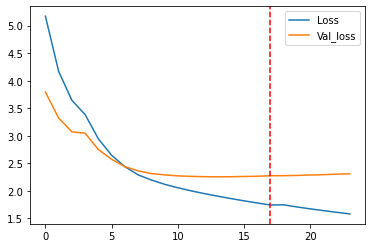

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
from matplotlib import pyplot as plt
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open("lossRecord_withNoise0.2").sheet1
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
del rows[0]
# Convert to a DataFrame and render.
import pandas as pd
df=pd.DataFrame.from_records(rows)
df.columns=['Loss',"Val_loss"]
df=df.astype(float)
k=df.plot()
k.axvline(x=17, color="red", linestyle="dashed")
k1.set_xlabel("Epoch")
k1.set_ylabel("Loss")


Text(0, 0.5, 'Loss')

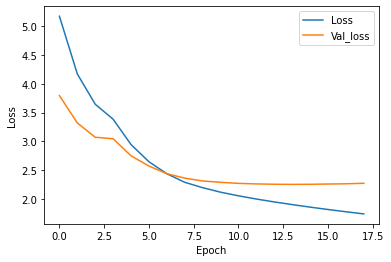

In [ ]:
worksheet1 = gc.open("lossRecord_withoutNoise").sheet1
# get_all_values gives a list of rows.
rows1 = worksheet1.get_all_values()
del rows1[0]
# Convert to a DataFrame and render.
import pandas as pd
df1=pd.DataFrame.from_records(rows1)
df1.columns=['Loss',"Val_loss"]
df1=df1.astype(float)
k1=df1.plot()
k1.set_xlabel("Epoch")
k1.set_ylabel("Loss")